In [10]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [11]:
# Importing the datasets
datasets = pd.read_csv('Social_Network_Ads.csv')
datasets.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [12]:
datasets.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


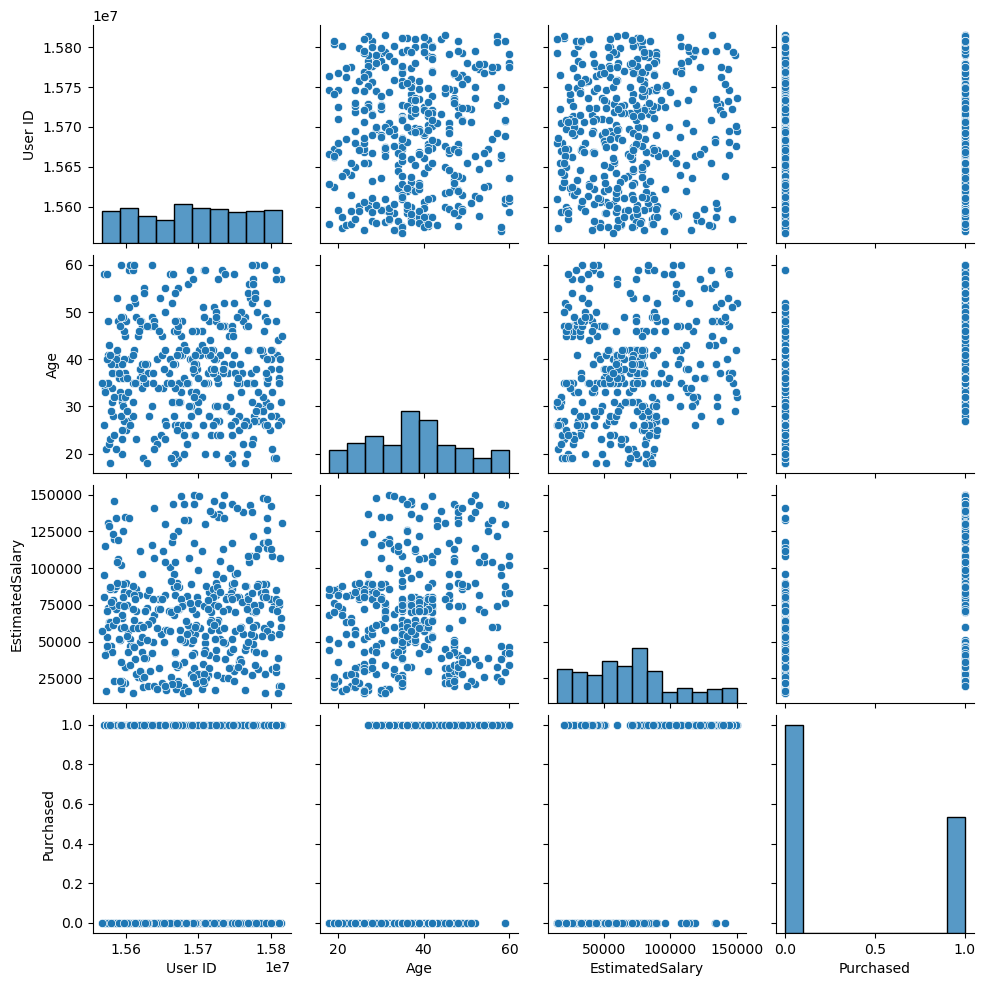

In [13]:
# Data visualization
sns.pairplot(datasets)

<AxesSubplot:ylabel='Density'>

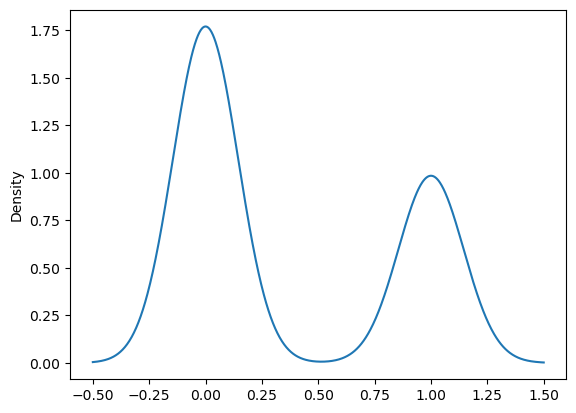

In [14]:
datasets['Purchased'].plot.density() 

In [15]:
datasets.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


<AxesSubplot:>

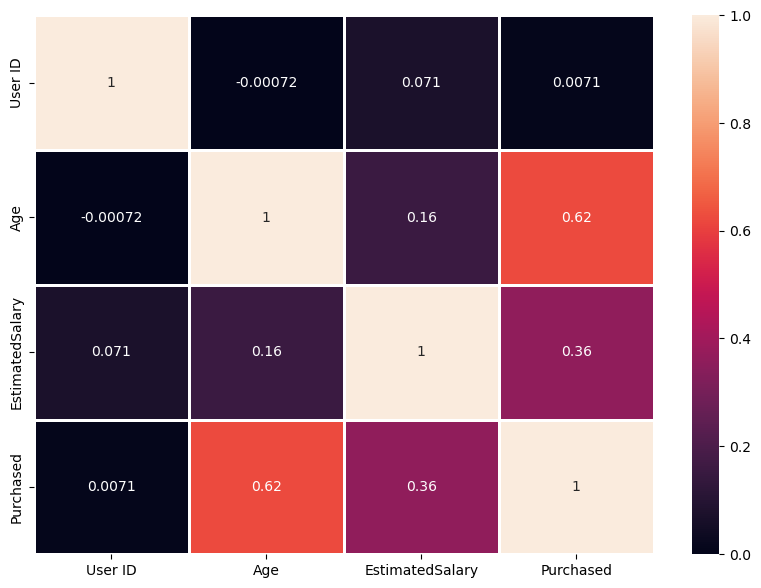

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(datasets.corr(),annot=True,linewidths=2)

In [17]:
# Encoding Gender 
datasets['Gender'].replace('Female',0 ,inplace=True)
datasets['Gender'].replace('Male', 1,inplace=True)

In [18]:
# Features and output selection
X = datasets.iloc[:, [1,2,3]].values
Y = datasets.iloc[:, 4].values

In [19]:
# Splitting the dataset into the Training set and Test set
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2, random_state = 0) 

In [20]:
# Feature Scaling
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)
print(X_Train.shape)
print(X_Test.shape)

(320, 3)
(80, 3)


In [21]:
# Fitting the Logistic Regression into the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_Train, Y_Train)

LogisticRegression(random_state=0)

In [22]:
# Predicting the test set results
Y_Pred = classifier.predict(X_Test)
Y_Pred_Train = classifier.predict(X_Train)

In [23]:
# Making the Confusion Matrix 
cm = confusion_matrix(Y_Test, Y_Pred)
show = pd.DataFrame(cm,columns=["yes","no"],index=["yes","no"])
show.head()

,yes,no
yes,56,2
no,5,17


In [24]:
# More metrics
print("Accuracy=", accuracy_score(Y_Test, Y_Pred))
print("F1=", f1_score(Y_Test, Y_Pred))
print("Precision=", precision_score(Y_Test, Y_Pred))

Accuracy= 0.9125
F1= 0.8292682926829269
Precision= 0.8947368421052632


In [42]:
# coeff and intercept
print("The intercept term:", classifier.intercept_)
print("The coefficients:", classifier.coef_)

The intercept term: [-0.87683183]
The coefficients: [[0.0788244  2.01759046 1.08668569]]


In [43]:
# Visualising the Training set results 
X_Set, Y_Set = X_Train, Y_Train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:,0].min() -1, stop = X_Set[:, 0].max() +1, step = 0.01),
                     np.arange(start = X_Set[:,1].min() -1, stop = X_Set[:, 1].max() +1, step = 0.01))

In [44]:
l_col = list(datasets.columns)

cdf = pd.DataFrame(data=np.array(classifier.coef_).reshape(3,1), index=datasets[l_col[1:4]].columns, columns=["Coefficients"])
cdf

,Coefficients
Gender,0.078824
Age,2.017590
EstimatedSalary,1.086686


In [45]:
n=X_Train.shape[0]
k=X_Train.shape[1]
dfN = n-k
train_pred=classifier.predict(X_Train)
train_error = np.square(train_pred - Y_Train)
sum_error=np.sum(train_error)
se=[0,0,0]
for i in range(k):
    r = (sum_error/dfN)
    r = r/np.sum(np.square(datasets[list(datasets.columns)[i]]-datasets[list(datasets.columns)[i]].mean()))
    se[i]=np.sqrt(r)
cdf['Standard Error']=se
cdf['t-statistic']=cdf['Coefficients']/cdf['Standard Error']
cdf

,Coefficients,Standard Error,t-statistic
Gender,0.078824,2.936374e-07,268441.326324
Age,2.017590,4.203889e-02,47.993426
EstimatedSalary,1.086686,2.007231e-03,541.385335


In [25]:
#Train and test metrics
print("Accuracy Test=", accuracy_score(Y_Test, Y_Pred))
print("Accuracy Train=", accuracy_score(Y_Train, Y_Pred_Train))
print("F1 Test=", f1_score(Y_Test, Y_Pred))
print("F1 Train=", f1_score(Y_Train, Y_Pred_Train))
print("Precision Test=", precision_score(Y_Test, Y_Pred))
print("Precision Train=", precision_score(Y_Train, Y_Pred_Train))

Accuracy Test= 0.9125
Accuracy Train= 0.825
F1 Test= 0.8292682926829269
F1 Train= 0.7477477477477477
Precision Test= 0.8947368421052632
Precision Train= 0.8217821782178217


In [47]:
# Model is not overfitting